In [1]:
from ioos_model_comparisons.platforms import get_glider_by_id

In [2]:
# glider id from the national glider dac
glider = "ng645-20210613T0000"
df = get_glider_by_id(glider)
df.head()

,longitude (degrees_east),latitude (degrees_north),pressure (decibar),depth (m),temperature (degrees_C),salinity (1),conductivity (mS cm-1),density (kg m-3)
time (UTC),,,,,,,,
2021-06-13 04:26:50,-94.591942,27.643408,0.279798,0.277945,29.0704,31.186760,51.763603,1019.18286
2021-06-13 04:26:50,-94.591942,27.643408,0.189863,0.188605,29.0598,31.188139,51.755400,1019.18700
2021-06-13 04:26:50,-94.591942,27.643408,0.139899,0.138972,29.0657,31.188772,51.762000,1019.18536
2021-06-13 04:26:50,-94.591942,27.643408,0.189863,0.188605,29.0679,31.189420,51.765100,1019.18530
2021-06-13 04:26:50,-94.591942,27.643408,0.259812,0.258092,29.0700,31.188171,51.765297,1019.18396


In [3]:
# Reset the index so we can rename all the columns to easier variable names
df = df.reset_index()
df.head()

,time (UTC),longitude (degrees_east),latitude (degrees_north),pressure (decibar),depth (m),temperature (degrees_C),salinity (1),conductivity (mS cm-1),density (kg m-3)
0,2021-06-13 04:26:50,-94.591942,27.643408,0.279798,0.277945,29.0704,31.186760,51.763603,1019.18286
1,2021-06-13 04:26:50,-94.591942,27.643408,0.189863,0.188605,29.0598,31.188139,51.755400,1019.18700
2,2021-06-13 04:26:50,-94.591942,27.643408,0.139899,0.138972,29.0657,31.188772,51.762000,1019.18536
3,2021-06-13 04:26:50,-94.591942,27.643408,0.189863,0.188605,29.0679,31.189420,51.765100,1019.18530
4,2021-06-13 04:26:50,-94.591942,27.643408,0.259812,0.258092,29.0700,31.188171,51.765297,1019.18396


In [4]:
# Rename all the variables
df = df.rename({
    "time (UTC)": "time",
    "longitude (degrees_east)": "lon",
    "latitude (degrees_north)": "lat",
    "pressure (decibar)": "pressure",
    "temperature (degrees_C)": "temperature",
    "depth (m)": "depth",
    "salinity (1)": "salinity",
    "conductivity (mS cm-1)": "conductivity",
    "density (kg m-3)": "density",
}, axis=1)
df.head()

,time,lon,lat,pressure,depth,temperature,salinity,conductivity,density
0,2021-06-13 04:26:50,-94.591942,27.643408,0.279798,0.277945,29.0704,31.186760,51.763603,1019.18286
1,2021-06-13 04:26:50,-94.591942,27.643408,0.189863,0.188605,29.0598,31.188139,51.755400,1019.18700
2,2021-06-13 04:26:50,-94.591942,27.643408,0.139899,0.138972,29.0657,31.188772,51.762000,1019.18536
3,2021-06-13 04:26:50,-94.591942,27.643408,0.189863,0.188605,29.0679,31.189420,51.765100,1019.18530
4,2021-06-13 04:26:50,-94.591942,27.643408,0.259812,0.258092,29.0700,31.188171,51.765297,1019.18396


In [5]:
from ioos_model_comparisons.calc import depth_bin, depth_interpolate

# Groupby 'time' and apply the your choice of depth gridding: depth_bin or depth_interpolate.
# It will use the defaults for those functions
df_interp = df.groupby(['time']).apply(depth_interpolate)
df_interp

depth        lon        lat    pressure  temperature  \
time                                                                            
2021-06-13 04:26:50 0        0 -94.591942  27.643408    0.139899     29.06570   
                    1       10 -94.591942  27.643408   10.292557     28.44485   
                    2       20 -94.591942  27.643408   20.485189     27.14745   
                    3       30 -94.591942  27.643408   30.462975     25.50040   
                    4       40 -94.591942  27.643408   40.465744     24.11405   
...                        ...        ...        ...         ...          ...   
2021-09-24 14:39:05 96     960 -88.167206  29.205790  194.390660     15.07430   
                    97     970 -88.167206  29.205790  194.390660     15.07430   
                    98     980 -88.167206  29.205790  194.390660     15.07430   
                    99     990 -88.167206  29.205790  194.390660     15.07430   
                    100   1000 -88.167206  29.205790  194.390660     15.07430   

                          salinity  conductivity     density  
time                                                          
2021-06-13 04:26:50 0    31.188772     51.762000  1019.18536  
                    1    35.551406     57.488599  1022.70747  
                    2    35.835145     56.497900  1023.38827  
                    3    36.338492     55.416800  1024.33160  
                    4    36.408237     54.019101  1024.85030  
...                            ...           ...         ...  
2021-09-24 14:39:05 96   36.022964     44.195700  1027.60820  
                    97   36.022964     44.195700  1027.60820  
                    98   36.022964     44.195700  1027.60820  
                    99   36.022964     44.195700  1027.60820  
                    100  36.022964     44.195700  1027.60820  

[105949 rows x 8 columns]

In [6]:
# Reset the index again so that we can drop the nameless second multi-index
df_interp = df_interp.reset_index().drop(['level_1'], axis=1)
df_interp

,time,depth,lon,lat,pressure,temperature,salinity,conductivity,density
0,2021-06-13 04:26:50,0,-94.591942,27.643408,0.139899,29.06570,31.188772,51.762000,1019.18536
1,2021-06-13 04:26:50,10,-94.591942,27.643408,10.292557,28.44485,35.551406,57.488599,1022.70747
2,2021-06-13 04:26:50,20,-94.591942,27.643408,20.485189,27.14745,35.835145,56.497900,1023.38827
3,2021-06-13 04:26:50,30,-94.591942,27.643408,30.462975,25.50040,36.338492,55.416800,1024.33160
4,2021-06-13 04:26:50,40,-94.591942,27.643408,40.465744,24.11405,36.408237,54.019101,1024.85030
...,...,...,...,...,...,...,...,...,...
105944,2021-09-24 14:39:05,960,-88.167206,29.205790,194.390660,15.07430,36.022964,44.195700,1027.60820
105945,2021-09-24 14:39:05,970,-88.167206,29.205790,194.390660,15.07430,36.022964,44.195700,1027.60820
105946,2021-09-24 14:39:05,980,-88.167206,29.205790,194.390660,15.07430,36.022964,44.195700,1027.60820
105947,2021-09-24 14:39:05,990,-88.167206,29.205790,194.390660,15.07430,36.022964,44.195700,1027.60820


In [7]:
# Set a multi-index with 'time' and 'depth.
df_interp = df_interp.set_index(['time', 'depth'])
df_interp

lon        lat    pressure  temperature  \
time                depth                                                  
2021-06-13 04:26:50 0     -94.591942  27.643408    0.139899     29.06570   
                    10    -94.591942  27.643408   10.292557     28.44485   
                    20    -94.591942  27.643408   20.485189     27.14745   
                    30    -94.591942  27.643408   30.462975     25.50040   
                    40    -94.591942  27.643408   40.465744     24.11405   
...                              ...        ...         ...          ...   
2021-09-24 14:39:05 960   -88.167206  29.205790  194.390660     15.07430   
                    970   -88.167206  29.205790  194.390660     15.07430   
                    980   -88.167206  29.205790  194.390660     15.07430   
                    990   -88.167206  29.205790  194.390660     15.07430   
                    1000  -88.167206  29.205790  194.390660     15.07430   

                            salinity  conductivity     density  
time                depth                                       
2021-06-13 04:26:50 0      31.188772     51.762000  1019.18536  
                    10     35.551406     57.488599  1022.70747  
                    20     35.835145     56.497900  1023.38827  
                    30     36.338492     55.416800  1024.33160  
                    40     36.408237     54.019101  1024.85030  
...                              ...           ...         ...  
2021-09-24 14:39:05 960    36.022964     44.195700  1027.60820  
                    970    36.022964     44.195700  1027.60820  
                    980    36.022964     44.195700  1027.60820  
                    990    36.022964     44.195700  1027.60820  
                    1000   36.022964     44.195700  1027.60820  

[105949 rows x 7 columns]

In [8]:
# The df.to_xarray() method will automatically convert all the multi-indexes to the appropriate dimensions in your xarray dataset
ds = df_interp.to_xarray()
ds

<xarray.Dataset>
Dimensions:       (time: 1049, depth: 101)
Coordinates:
  * time          (time) datetime64[ns] 2021-06-13T04:26:50 ... 2021-09-24T14...
  * depth         (depth) int64 0 10 20 30 40 50 60 ... 950 960 970 980 990 1000
Data variables:
    lon           (time, depth) float64 -94.59 -94.59 -94.59 ... -88.17 -88.17
    lat           (time, depth) float64 27.64 27.64 27.64 ... 29.21 29.21 29.21
    pressure      (time, depth) float64 0.1399 10.29 20.49 ... 194.4 194.4 194.4
    temperature   (time, depth) float64 29.07 28.44 27.15 ... 15.07 15.07 15.07
    salinity      (time, depth) float64 31.19 35.55 35.84 ... 36.02 36.02 36.02
    conductivity  (time, depth) float64 51.76 57.49 56.5 ... 44.2 44.2 44.2
    density       (time, depth) float64 1.019e+03 1.023e+03 ... 1.028e+03

In [9]:
# Resample the data to 24 hours.
tds = ds.resample(time='24H').interpolate('linear')
tds

<xarray.Dataset>
Dimensions:       (depth: 101, time: 104)
Coordinates:
  * depth         (depth) int64 0 10 20 30 40 50 60 ... 950 960 970 980 990 1000
  * time          (time) datetime64[ns] 2021-06-13 2021-06-14 ... 2021-09-24
Data variables:
    lon           (time, depth) float64 nan nan nan nan ... -88.11 -88.11 -88.11
    lat           (time, depth) float64 nan nan nan nan ... 29.2 29.2 29.2 29.2
    pressure      (time, depth) float64 nan nan nan nan ... 194.3 194.3 194.3
    temperature   (time, depth) float64 nan nan nan nan ... 14.79 14.79 14.79
    salinity      (time, depth) float64 nan nan nan nan ... 35.98 35.98 35.98
    conductivity  (time, depth) float64 nan nan nan nan ... 43.87 43.87 43.87
    density       (time, depth) float64 nan nan nan ... 1.028e+03 1.028e+03

(1000.0, 0.0)

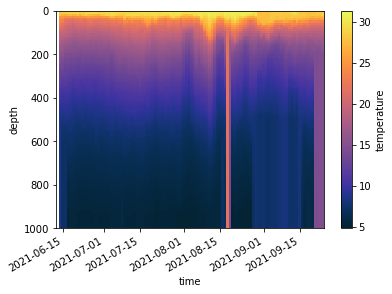

In [18]:
import matplotlib.pyplot as plt
import cmocean as cm

ax = tds.temperature.plot(x='time', cmap=cm.cm.thermal)
plt.ylim([1000, 0])